# Data Analysis

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [General Observation](#General-Observation)
- [Attribute Analysis](#Attribute-Analysis)
- [Metadata Handover](#Metadata-Handover)
- [Summary](#Summary)

## Sample Records Analysis

In this section, the data file is loaded and some sample data records are shown.

In [1]:
import os
import json

records = []
path_data = './data'
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded', len(records))

Number of data records loaded 183407


In [2]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


In [3]:
print('Number of records {:d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format      

Swissbib data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [4]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [5]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [6]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes1833-1897(DE-588)11851...
corporate                                                    {}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [7]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph196...
corporate                                                    {}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon1571-1638(DE-588...
corporate                                                    {}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person                                {'100': [], '245c': ['']}
corporate               {'110': ['St. Gallischer Hilfsverein']}
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

## General Observation

As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [12]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"245c":["André Schluchter"]},"corporate":{},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"245c":["von Werner Naegeli"]},"corporate":{},"pubyear":"1986    ","decade":"1986","century":"1986","exactDate":"1986    ","edition":"","part":[],"pag

A specific analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to its specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [13]:
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [14]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the upcoming chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [15]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- musicid
- [pages](#pages)
- part
- [person](#person)
- pubinit
- pubword
- [pubyear](#pubyear)
- scale
- [ttlfull](#ttlfull)
- ttlpart
- [volumes](#volumes)

### 035liste

In [16]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [17]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [18]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [19]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [20]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


84558                 [(OCoLC)1089817658, (NEBIS)011355004]
66562                  [(OCoLC)603968833, (IDSBB)004805916]
40534        [(SERSOL)ssib032078411, (WaSeSS)ssib032078411]
158108                                        [(CEO)171589]
36878        [(SERSOL)ssib033971934, (WaSeSS)ssib033971934]
107127    [(VAUD)991021119808402852, (CKB)33900000000293...
54969                 [(OCoLC)1085551573, (IDSBB)007057360]
81478     [(ETHRESEARCH)oai:www.research-collection.ethz...
49335     [(VAUD)991021046565902852, (CKB)31700000000528...
2463                   [(IDSBB)006334166, (NEBIS)010259369]
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [21]:
columns_metadata_dict['strings_columns'] = ['century']

In [22]:
idx_century_filled, idx_century_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'century')

daf.two_examples(df, idx_century_filled, idx_century_empty)

Number of records with filled century 183407, with missing century 0 => 100.0%

EMPTY - None

FILLED - index 0 

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 

Attribute $\texttt{century}$ holds information on the year of origin of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute holds strings of length 4 that can predominantly be interpreted as year-dates. Some examples and the top-most quantity distribution are shown below.

In [23]:
df['century'].sample(n=15)

161345    1995
70128     2018
61270     2016
117497    uuuu
87924     2019
93139     1879
133275    1992
103926    2018
81191     2019
174719    1973
57374     2018
24265     2018
138649    2018
73973     1978
27586     2017
Name: century, dtype: object

In [24]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [25]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [26]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

In [27]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

The following graph shows the publishing activity of Western European literature.

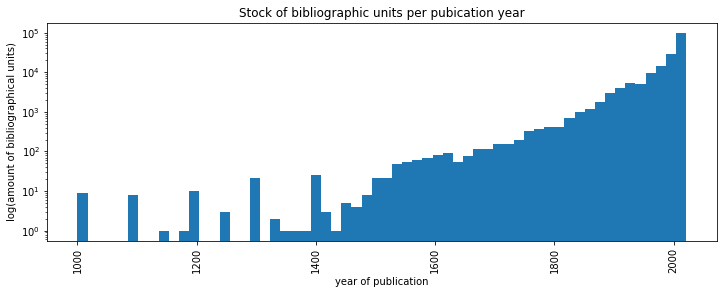

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

The attribute is taken over to the feature matrix without an extra processing in [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [29]:
columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [30]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographical unit of format map.

In [31]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [32]:
_, _ = daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [33]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

145721    [E0053832, E0053842, N0465129, N0465123]
182727                        [E0070045, N0465034]
31300                                           []
20641                         [E0082000, N0474200]
172523                        [E0075029, N0461914]
78594                         [E0042400, N0554400]
114691                        [E0090500, N0470609]
18391                                           []
133225                        [E0085041, N0464654]
113746                        [E0085812, N0470924]
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [34]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

15139     [E012.500000, E0123000, N046.750000, N0464500]
83161           [E0073547, E0073544, N0465345, N0465341]
135681          [E0083706, E0083706, N0470000, N0470001]
137329          [E0082310, E0082314, N0464707, N0464711]
20644           [E0054415, E0054415, N0480000, N0480005]
143472          [E0064728, E0064725, N0461460, N0461455]
138344          [E0053613, E0053623, N0475929, N0475919]
141177          [E0092606, E0092611, N0471527, N0471532]
145722          [E0071437, E0071441, N0462126, N0462130]
61409           [E0055427, E0055432, N0474810, N0474813]
Name: coordinate, dtype: object

In [35]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [36]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix.

In [37]:
columns_metadata_dict['data_analysis_columns'].append('coordinate')

### corporate

In [38]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three possible key value pairs. For reasons of easier processing, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [39]:
df.corporate.sample(n=20)

53813                                                    {}
56843                                                    {}
77964                                                    {}
63812                                                    {}
15463                                                    {}
57370                                                    {}
97616                                                    {}
89209                                                    {}
48481                                                    {}
81037                                                    {}
43533                                                    {}
9690                                                     {}
144013                                                   {}
39638                                                    {}
56799                                                    {}
146623                                                   {}
17095                                   

In [40]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%
Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%
Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographical units are units produced by persons, not corporates.

In [41]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [42]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [43]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,"verein deutscher bibliothekare, regionalverban...","verein deutscher bibliothekare, zentral- und l..."
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,"heilsarmee, nationales hauptquartier bern","salvation army, nationales hauptquartier"
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [44]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

157093                            bahrain olympic committee
152552    general association of international sports fe...
152808                 comitato olimpico nazionale italiano
153636                           japanese olympic committee
28888                       zürcherische pestalozzistiftung
169739                      international tennis federation
102771                            galerie priska meier zell
166384                                olympia-büro (berlin)
164636             united states figure skating association
154591        comité national olympique et sportif français
151548                              comité olympique suisse
171172                      international olympic committee
150663    summer youth olympic games. organizing committ...
152711        kuopio 2012 youth olympic games bid committee
162821                             slovak olympic committee
168510                      international olympic committee
156983    summer youth olympic games. or

In [45]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

131258                         medienprojekt wuppertal e.v.
22145                                     diogenes quartett
160265                           musée olympique (lausanne)
42402                         springerlink (online service)
79060                                                  spie
80270                                            un-habitat
32272                                       ray bryant trio
2160                                              marillion
19791                                    universität zürich
123754                           deutsches reich, patentamt
10436                              berliner barock solisten
19152                        repubblica elvetica, 1798-1803
153048                          british olympic association
27379                                 pavillon de l'arsenal
139864    conference on private and unregulated transpor...
130116             bundesinstitut für bevölkerungsforschung
19839                              ggg b

In [46]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

72562                                         werbung kiser
15102               schweiz, bundesamt für landestopografie
110582                              hallwag kümmerly + frey
138344              schweiz, bundesamt für landestopografie
72548                                         werbung kiser
52134                       kunsthandlung helmut h. rumbler
45080                           wirtschaftsuniversität wien
106184                              hallwag kümmerly + frey
115817                deutschland, verteidigungsministerium
133706    carnegie endowment for international peace., d...
110598                              hallwag kümmerly + frey
25428               schweiz, bundesamt für landestopografie
110597                              hallwag kümmerly + frey
94678                                             hécatombe
25374               schweiz, bundesamt für landestopografie
110568                                            hema maps
94674                                   

In [47]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080              {'810': ['Wirtschaftsuniversität Wien']}
47145     {'110': ['Biochemical Society (Great Britain)'...
52134     {'710': ['Kunsthandlung Helmut H. Rumbler'], '...
94673     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94674     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94678     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94679     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94680     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
113869                 {'810': ['Peter-Ochs-Gesellschaft']}
113870                 {'810': ['Peter-Ochs-Gesellschaft']}
133706    {'110': ['Carnegie Endowment for International...
133739    {'810': ['Deutschland', 'Verteidigungsminister...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key value 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

In [48]:
columns_metadata_dict['data_analysis_columns'].append('corporate_110')
columns_metadata_dict['data_analysis_columns'].append('corporate_710')

### decade

In [49]:
columns_metadata_dict['strings_columns'].append('decade')

In [50]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format,corporate_110,corporate_710,corporate_810


The attribute holds identical data to attribute $\texttt{century}$. Its MARC 21 definition is the same, too. The purpose of the field is to derive the decade of the year of origin of a bibliographic unit and store it for comparison. This is done in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)]. Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{century}$ that takes the decade into specific consideration for attribute $\texttt{century}$. Therefore, attribute $\texttt{decade}$ will be dropped.

### docid

In [51]:
columns_metadata_dict['strings_columns'].append('docid')

In [52]:
idx_docid_filled, idx_docid_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [53]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [54]:
columns_metadata_dict['list_columns'].append('doi')

In [55]:
idx_doi_filled, idx_doi_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 10114, with missing doi 173293 => 5.5%


In [56]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1854                                     [00028947575214]
1899    [10.5451/unibas-007052902, urn:nbn:ch:bel-bau-...
1937    [10.5451/unibas-007052953, urn:nbn:ch:bel-bau-...
2046                                     [04600317120499]
2063                                     [00602567484134]
2207                                     [00039841539226]
2245                                     [00096802280399]
2286                                     [00761195120422]
2494                                     [04250095800740]
2779                                     [00888837038720]
2996                     [urn:nbn:de:101:1-2016111912809]
3087                                     [00605633131628]
3385                     [urn:nbn:de:101:1-2017040728657]
4094                                     [00602547324375]
4504                                     [00656605612812]
4710                             [10.14361/9783839445334]
6579                                     [00887254706021]
7624          

In [57]:
df.loc[1854]

docid                                                    554099918
035liste         [(OCoLC)71126385, (IDSBB)007052820, (OCoLC)711...
isbn                                                            []
ttlfull          {'245': ['Symphony no. 8'], '246': ['Symphony ...
ttlpart                                {'245': ['Symphony no. 8']}
person           {'100': ['MahlerGustav1860-1911(DE-588)1185762...
corporate        {'710': ['Konzertvereinigung Wiener Staatsoper...
pubyear                                                   20062006
decade                                                        2006
century                                                       2006
exactDate                                                 20062006
edition                                                           
part                                                            []
pages                                               [1 Cd (79:48)]
volumes                                             [1 Cd (79:

In [58]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

2,312 records hold 1 list element(s).
13 records hold 2 list element(s).
11 records hold 3 list element(s).
1 records hold 4 list element(s).
0 records hold 5 list element(s).
=> Maximum number of list elements 4


Attribute $\texttt{doi}$ is a digital object identifier. It will be taken to the feature matrix without modification.

In [59]:
#columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [60]:
columns_metadata_dict['strings_columns'].append('edition')

In [61]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [62]:
df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=10)

59569                     2. Auflage
108785               Second edition.
1772                        13.Aufl.
98306                     1. Auflage
4072               Deutsche Erstausg
48563     [11. Aufl. der Ausg. 1979]
14522                        7. Aufl
171869                    4. Auflage
77828      1. korrigierter Nachdruck
7921                         2. Aufl
Name: edition, dtype: object

The attribute is taken to the feature matrix without an extra processing in [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [63]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [64]:
columns_metadata_dict['strings_columns'].append('exactDate')

In [65]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [66]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format,corporate_110,corporate_710,corporate_810


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit.

In [67]:
print('Degree of non-blank filling of last 4 digits {:.1f}%'.format(
    df.exactDate[df.exactDate.str[4:] != '    '].count()/len(df)*100))
print('Degree of numerical filling of last 4 digits {:.1f}%'.format(
    df.exactDate[~df.exactDate.str[4:].isin(['    ', 'uuuu'])].count()/len(df)*100))

Degree of non-blank filling of last 4 digits 19.4%
Degree of numerical filling of last 4 digits 13.3%


In [68]:
df.exactDate[df.exactDate.str[4:] != '    '].head()

12     uuuuuuuu
61     uuuuuuuu
62     uuuuuuuu
117    19241925
257    uuuuuuuu
Name: exactDate, dtype: object

In [69]:
df.loc[183319]

docid                                                    556987284
035liste                        [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                            []
ttlfull          {'245': ['Altered limbic and autonomic process...
ttlpart          {'245': ['Altered limbic and autonomic process...
person           {'100': [], '700': ['TemplinChristianjoint aut...
corporate                                                       {}
pubyear                                                   20190414
decade                                                        2019
century                                                       2019
exactDate                                                 20190414
edition                                                           
part                                            [40(15):1183-1187]
pages                                                           []
volumes                                                       

Due to its added information supply to attribute $\texttt{century}$, the attribute is taken to the feature matrix.

In [70]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [71]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis).

In [72]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [73]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

34048     bk020053
79969     bk020000
42707     bk020053
142294    mu010100
96421     bk010053
137853    bk020000
130400    bk020000
139161    bk020000
116599    bk020000
32181     bk020000
Name: format, dtype: object

In [74]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [75]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

150255    
167021    
165050    
151276    
167594    
171176    
164984    
158927    
169102    
165866    
Name: format, dtype: object

In [76]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [77]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of the bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and and an inferior reliability due to freedom of interpretation. For this reason, the attribute is divided into 2 new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the 6 subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [78]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
118240,bk020053,bk,020053
146871,bk020000,bk,020000
33992,bk020053,bk,020053
87094,bk020000,bk,020000
84800,bk010000,bk,010000
129857,bk020053,bk,020053
179399,bk020053,bk,020053
44438,bk020053,bk,020053
146550,bk020000,bk,020000
177644,vm010200,vm,010200


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format()}$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py)

In [79]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [80]:
columns_metadata_dict['list_columns'].append('isbn')

In [81]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


In [82]:
df.isbn.sample(n=20)

94153                    [978-3-7799-3769-2, 3-7799-3769-7]
37021     [978-0-231-13942-7 (cloth : alk. paper), 0-231...
61108                                   [978-88-8192-044-0]
17173                    [978-3-86740-816-5, 3-86740-816-5]
110076                                                   []
79845                                   [978-2-226-07024-1]
72962                                                    []
144589                                      [84-393-3169-X]
76143                                                    []
70976                                                    []
9614                                                     []
62821                                   [978-3-8288-4163-5]
5319         [978-3-8321-9605-9 (cl.), 3-8321-9605-6 (cl.)]
177712                                                   []
72814                                                    []
59247                                   [978-3-8283-0810-7]
122477                                  

In [83]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

29,073 records hold 1 list element(s).
3,762 records hold 2 list element(s).
2,331 records hold 3 list element(s).
519 records hold 4 list element(s).
398 records hold 5 list element(s).
173 records hold 6 list element(s).
156 records hold 7 list element(s).
84 records hold 8 list element(s).
76 records hold 9 list element(s).
51 records hold 10 list element(s).
43 records hold 11 list element(s).
29 records hold 12 list element(s).
26 records hold 13 list element(s).
19 records hold 14 list element(s).
18 records hold 15 list element(s).
10 records hold 16 list element(s).
9 records hold 17 list element(s).
8 records hold 18 list element(s).
7 records hold 19 list element(s).
7 records hold 20 list element(s).
7 records hold 21 list element(s).
7 records hold 22 list element(s).
7 records hold 23 list element(s).
5 records hold 24 list element(s).
4 records hold 25 list element(s).
3 records hold 26 list element(s).
3 records hold 27 list element(s).
3 records hold 28 list element(s).

This attribute holds two different kinds of information, namely the ISBN and the ISSN of a bibliographic unit. Attribute $\texttt{isbn}$ is a list of string elements. Some samples with more than one string element are shown below.

In [84]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

34853     [978-1-108-39959-3, 1-108-39959-2, 978-1-108-4...
28221     [978-3-7910-2601-5, 978-3-7910-2602-2, 978-3-7...
20851     [4-89434-420-3, 4-89434-421-1, 4-89434-435-1, ...
34159     [978-2-7560-2233-8, 978-2-7560-2234-5, 978-2-7...
171599    [0-8247-6093-X, 0-8247-6135-9, 0-8247-6137-5, ...
16380     [978-4-06-509002-2, 4-06-509002-4, 978-4-06-50...
127001    [978-1-315-76651-5, 1-315-76651-5, 1-317-66066...
57183     [978-4-7629-3591-6, 4-7629-3591-3, 978-4-7629-...
78433     [978-2-917045-15-2, 978-2-917045-16-9, 978-2-9...
84105     [978-3-12-607026-3, 3-12-607026-4, 978-3-12-60...
Name: isbn, dtype: object

### ismn

In [85]:
columns_metadata_dict['list_columns'].append('ismn')

In [86]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 10114, with missing ismn 173293 => 5.5%


In [87]:
i = 0
while len(df.isbn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>i]), i))
        
print('=> Maximum number of list elements', i-1)

2,312 records hold 1 list element(s).
13 records hold 2 list element(s).
11 records hold 3 list element(s).
1 records hold 4 list element(s).
0 records hold 5 list element(s).
=> Maximum number of list elements 4


In [88]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

24866    [oai:serval.unil.ch:BIB_48517DE762D2, urn:nbn:...
34755    [10.5451/unibas-006838498, urn:nbn:ch:bel-bau-...
34758    [10.5451/unibas-006836804, urn:nbn:ch:bel-bau-...
34814    [10.5451/unibas-006837535, urn:nbn:ch:bel-bau-...
34833    [10.5451/unibas-006844191, urn:nbn:ch:bel-bau-...
Name: ismn, dtype: object

### pages

In [89]:
columns_metadata_dict['list_columns'].append('pages')

In [90]:
idx_pages_filled, idx_pages_empty = daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


In [91]:
# Identical to volumes
#columns_metadata_dict['data_analysis_columns'].append('pages')

### person

In [92]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal names statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [93]:
df.person.sample(20)

178570    {'100': ['MohamedJimmyaut'], '245c': ['Jimmy M...
98402     {'100': ['CauteAdelinecre'], '245c': ['Adeline...
167865    {'100': ['KikouOlga'], '245c': ['par Olga Kiko...
129604     {'100': [], '700': ['Smith'], '245c': ['Smith']}
133846    {'100': ['JohnSt'], '700': ['JOHNSAINT', 'Buck...
159545    {'100': [], '245c': ['[Cyprus Olympic Committe...
46274     {'100': ['DannenfeldtKarl H.Verfasseraut'], '2...
145187    {'100': ['WengenStefan à.1964-(DE-588)14138762...
43331     {'100': ['MugicaMiguel Zulaica Y.author'], '24...
6829      {'100': [], '700': ['EttlingerMax', 'SimonPaul...
19095     {'100': ['ThürlimannChristinaVerfasseraut'], '...
92122     {'100': [], '700': ['ThelesklafDaniel'], '245c...
170620                            {'100': [], '245c': ['']}
93491     {'100': ['RoyJean-René(RERO)A003767338cre'], '...
99405     {'100': ['SteinkellnerErnst1937-(DE-588)133888...
17651     {'100': ['BottlingerAndrea1985-(DE-588)1034036...
13226     {'100': ['Hegglin-BartholetBri

In [94]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%
Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%
Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%
Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [95]:
df.person_100.sample(20)

122873                                                   
157560                                      keithlarry f.
15837                                                    
118848                                    niebuhrreinhold
179942                                                   
310                                                      
141025           brun-cosmenadine1960-(rero)a003050324aut
126511                                        gardnerlisa
159489                                                   
34536                                                    
139730    beesemelanie1981-(de-588)104843575xverfasseraut
149501                                      hendersonfran
9055                                        guns n' roses
122143                                                   
73047            melillomichele1915-2004(de-588)119049627
27832                                                    
26960                          strallamichaelverfasseraut
94695         

In [96]:
df.person_700.sample(20)

50419     iben hollensbergannaverfasseraut, gylling mort...
154942                                                     
13048                                                      
104743    wederwalterjoint author, kaiserl.ctb, jamieson...
180602                    besençonmélina(rero)a024994966aut
31197           kostopulos-coopermanceleste(rero)a027771141
159286                                                     
47427                                                      
93831     dakovićnevena(de-588)1190920875herausgeberedt,...
141059                                                     
165623                                                     
39942                                             feinrashi
157841                                                     
7966                                                       
84308                                                      
132545    schützheinrich1585-1672italienische madrigale(...
155650                                  

In [97]:
df.person_800.sample(20)

119601    
175069    
29740     
120664    
166620    
72941     
77472     
109760    
31260     
45868     
106303    
97607     
140516    
115701    
102976    
41454     
182149    
144122    
406       
108038    
Name: person_800, dtype: object

In [98]:
df.person_245c.sample(20)

115935                                         lin lougheed
69688                                      georges bernanos
163807     comp. by the republic of china olympic committee
178581                                      alberto campana
116917                                     reinhold niebuhr
1949                                        osvaldo coisson
141232                              martin maria reinkowski
79518                                 von nagaraja chappidi
177059    anu stohner, henrike wilson ; gelesen von sigr...
157782                                     madalina diaconu
107053                                                     
65248                                            h. bonnard
27849     curaverunt josé eduardo lópez pereira ... [et ...
152732    [hrsg. vom organisationskomitee für die spiele...
21178                         natalia królikowska-jedlińska
72927                                         debbie harter
44058                                   

Column $\texttt{person_245c}$ is identified as the most complete and usefull personal name attribute and will be used as a basis for the data of the feature matrix.

In [99]:
#columns_metadata_dict['data_analysis_columns'].append('person_100')
#columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

### pubyear

In [100]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [101]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [102]:
df[df.exactDate != df.pubyear]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,musicid,format,corporate_110,corporate_710,corporate_810,format_prefix,format_postfix,person_100,person_700,person_800,person_245c


All 8 digits of $\texttt{pubyear}$ hold identical data compared to field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)]. Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### ttlfull

In [103]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [104]:
df.ttlfull.sample(20)

40272     {'245': ['Income-Based Property Tax Relief', '...
148947    {'245': ['Symphony no. 4 (1992)', 'Les espaces...
164143    {'245': ['The Lithuanian National Team at the ...
129461    {'245': ['Doctrina numorum veterum'], '246': [...
40662                     {'245': ['The kingdom of fungi']}
21327     {'245': ['Die Bilder des letzten Abendmahles i...
157094    {'245': ['Competitors and officials guide to d...
48620          {'245': ['Leben des Galilei', 'Schauspiel']}
75664     {'245': ['The Northern Neotropics', 'Panama, C...
47693     {'245': ['Haus Viktoria Fiesch', 'von Josef Ig...
180733    {'245': ['Memoria sopra il metodo di estrarre ...
169630    {'245': ['Die zweite Chance, oder Mein Leben m...
166370     {'245': ['The Olympic Games', 'a bibliography']}
95296     {'245': ['Architecture d'un marcheur', 'entret...
15353                      {'245': ['Bulletproof picasso']}
113637    {'245': ['Bailey & Love's essential clinical a...
101831            {'245': ['Agrippa d'Au

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process the list elements into one single string of the column.

In [105]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    _, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%
Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


In [106]:
df.ttlfull_245.sample(20)

151496    australia, nine contemporary artists : los ang...
13448     vom osten strahlt ein stern herein, geschichte...
143295    the unexpected scalia, a conservative justice'...
36207          indo-roman trading centres in andhra pradesh
19808     insights from marchantia polymorpha into the e...
119793    the disclosure of the sovereign will of god ov...
41624     nanomaterials in plants, algae and microorganisms
111167    petite biographie de louis veillard, curé du c...
62295     stamnos des euphronios, festgabe zur winckelma...
82334                us destroyers 1934-35, pre-war classes
71400     technologisches wörterbuch in französischer, d...
91378               alexander calder - performing sculpture
56236             du vent, du sable et des étoiles, oeuvres
20952                 drei kaiserdome, mainz, worms, speyer
71981     ludovic grootaers en gesinus gerhardus kloeke'...
141058     rub-aktuell, zeitung der ruhr-universität bochum
135716         klerikale politik im neun

In [107]:
df.ttlfull_246.sample(20)

24664                       
48934                       
143368                      
17727                       
140307                      
172576                      
41568                       
148466                      
58754                       
30666                       
64788                       
24040                       
118718                      
40887                       
61423                       
73915                       
127682                      
158178                      
161786                      
181321    report to congress
Name: ttlfull_246, dtype: object

The two new columns will be used as a basis for the data of the feature matrix.

In [108]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### volumes

In [109]:
columns_metadata_dict['list_columns'].append('volumes')

In [110]:
_, _ = daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages, volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Some examples are shown below.

In [111]:
df['volumes'].sample(n=15)

48366                            [384 S.]
74328             [8, 342 S., 4 photogr.]
172787                           [428 S.]
134789                [1 online resource]
89013     [1 online resource (289 pages)]
62399                        [325 Seiten]
155784                           [141 p.]
148274                           [461 S.]
181562                                 []
14089                   [2 Compact Discs]
140433                [1 online resource]
38539                 [1 online resource]
85521              [320 Seiten in 1 Teil]
107760                                 []
136077                [1 online resource]
Name: volumes, dtype: object

The attribute comes along as a list of one string element. A function for data preparation has been written to extract the element out of the list and store it as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [112]:
df = dpf.transform_list_to_string(df, 'volumes')

In [113]:
df['volumes'].sample(n=15)

58277                               370 p.
32824                                     
171818                                    
148814                                  v.
176234                              210 s.
84103                                     
178465    [52], 947, [1 bl., 30, 2 bl.] p.
154040                                8 p.
72554                 48 ungezählte seiten
176016                                    
132345                          177 seiten
80421                                     
83625                                81 s.
13920                     1 disque compact
175632                              146 p.
Name: volumes, dtype: object

In [114]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['s. 102-114' '43 s.' '75 p.' ... '232 s., 2 bl. taf.'
 '26 seiten, 7 ungezählte blätter bildtafeln' 'xli, 282 seiten']

Total number of unique values 36,466


In [115]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Metadata Handover

To hand over the attributes dictionary of this chapter as metadata, the dictionary is saved into a pickle file that will be read in the next chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb) as input file.

In [117]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).